# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# 2. Data Inspection

In [2]:
# load the data
df = pd.read_csv('diabetes_data.csv')

# inspect the top few rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


**Age** is the only numerical variable in the dataset

In [3]:
# rename columns for consistency
df.columns = df.columns.str.lower()

In [4]:
# get a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

- The data contains 520 rows and 17 columns
- There are no missing values

In [5]:
# check a detailed summary of the numerical attribute
df.describe()

,age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


- The youngest patient in the dataset is 16 years of age while the oldest is 90 years old
- The average age of the patients represented in the data set is 47.5 years

# 3. Exploratory Data Analysis

### Diabetic Class

What percentage of the cases in the dataset is diabetic?

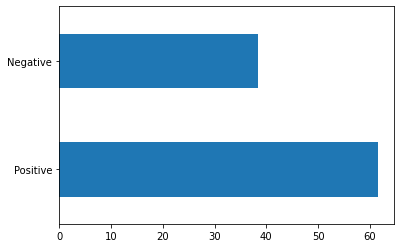

In [6]:
(df['class'].value_counts(normalize=True)*100).plot.barh();

More than 60 percent of the patients were found to be diabetic

In [7]:
positive = df[df['class']=='Positive']

### Age

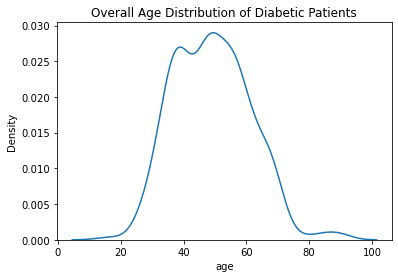

In [10]:
sns.distplot(positive.age, hist=False)
plt.title('Overall Age Distribution of Diabetic Patients');

Over 70 percent of the diabetic patients experienced genital thrush.

Let's see if genital thrush was more common in a particular gender

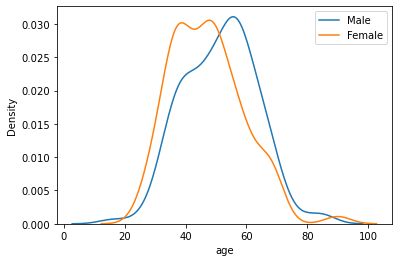

In [16]:
sns.distplot(positive[positive.gender=='Male'].age,label='Male',hist=False)
sns.distplot(positive[positive.gender=='Female'].age,label='Female',hist=False)
plt.legend();

Younger women suffered diabetes than the older ones

### Gender

How well are each gender represented?

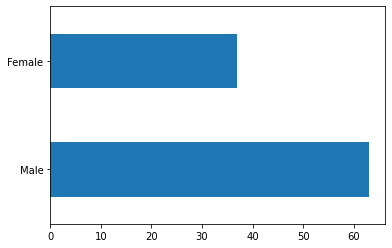

In [19]:
gender = df.gender.value_counts(normalize=True)*100
gender.plot.barh();

About 40 percent of the patients are female

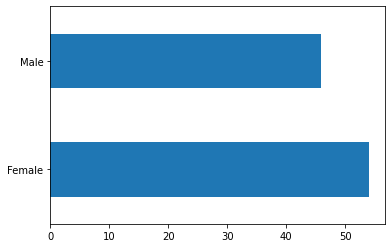

In [133]:
gender = positive.gender.value_counts(normalize=True)*100
gender.plot.barh();

Over 50 percent of the diabetic patients are female

### Sudden Weight Loss

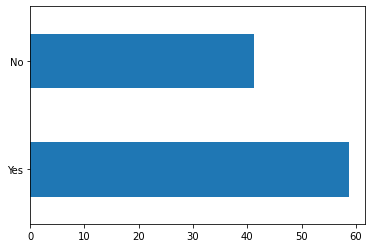

In [97]:
weight_loss = positive['sudden weight loss'].value_counts(normalize=True)*100
weight_loss.plot.barh();

About 60 percent of the diabetic patients experienced sudden weight loss.

Let's see if weight loss was more common in a particular gender

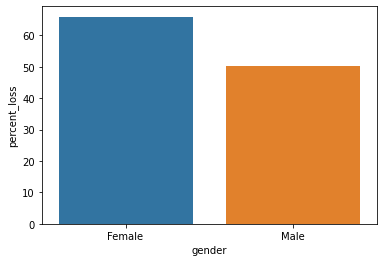

In [101]:
gender_loss = pd.crosstab(index=positive.gender,columns=positive['sudden weight loss']).reset_index()
gender_loss['percent_loss'] = gender_loss.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_loss',data=gender_loss);

A larger percentage of the diabetic female patients expereinced sudden weight loss

### Weakness

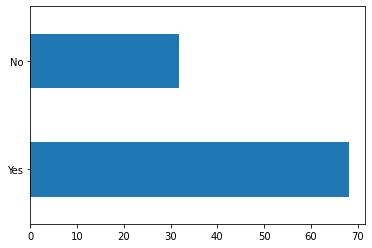

In [105]:
weakness = positive['weakness'].value_counts(normalize=True)*100
weakness.plot.barh();

About 70 percent of the diabetic patients experienced weakness.

Let's see if weakness was more common in a particular gender

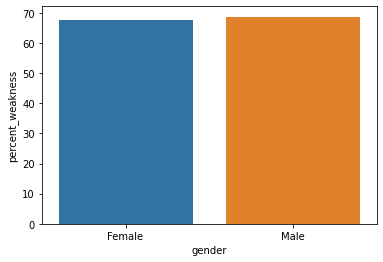

In [113]:
gender_weakness = pd.crosstab(index=positive.gender,columns=positive['weakness']).reset_index()
gender_weakness['percent_weakness'] = gender_weakness.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_weakness',data=gender_weakness);

Almost an equal percentage of male and female suffered weakness

### Genital Thrush

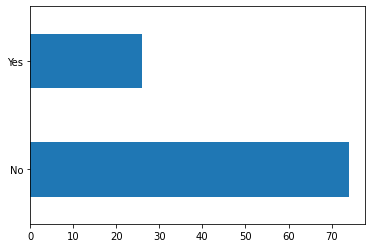

In [115]:
gen_thrush = positive['genital thrush'].value_counts(normalize=True)*100
gen_thrush.plot.barh();

Over 70 percent of the diabetic patients experienced genital thrush.

Let's see if genital thrush was more common in a particular gender

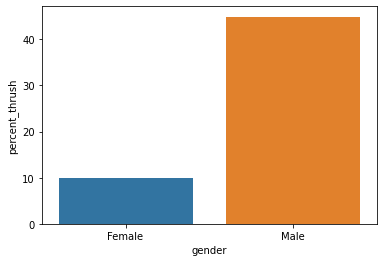

In [116]:
gen_thrush = pd.crosstab(index=positive.gender,columns=positive['genital thrush']).reset_index()
gen_thrush['percent_thrush'] = gen_thrush.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_thrush',data=gen_thrush);

A large percentage of male experienced genital thrush

### Visual Blurring

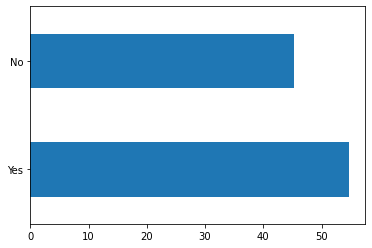

In [118]:
blurring = positive['visual blurring'].value_counts(normalize=True)*100
blurring.plot.barh();

Over 70 percent of the diabetic patients experienced genital thrush.

Let's see if genital thrush was more common in a particular gender

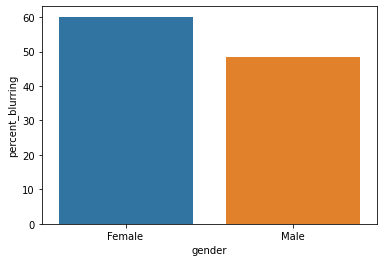

In [121]:
gen_blurring = pd.crosstab(index=positive.gender,columns=positive['visual blurring']).reset_index()
gen_blurring['percent_blurring'] = gen_blurring.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_blurring',data=gen_blurring);

A large percentage of male experienced genital thrush

### Itching

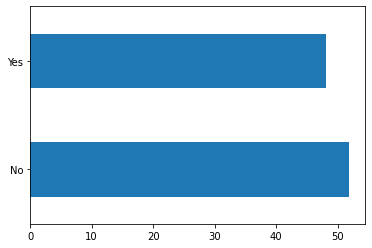

In [122]:
itching = positive['itching'].value_counts(normalize=True)*100
itching.plot.barh();

Over 70 percent of the diabetic patients experienced genital thrush.

Let's see if genital thrush was more common in a particular gender

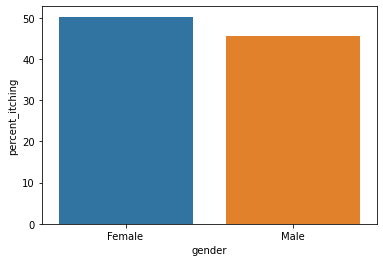

In [124]:
gen_itching = pd.crosstab(index=positive.gender,columns=positive['itching']).reset_index()
gen_itching['percent_itching'] = gen_itching.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_itching',data=gen_itching);

A large percentage of male experienced genital thrush

### Delayed Healing

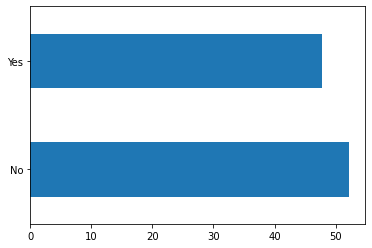

In [126]:
healing = positive['delayed healing'].value_counts(normalize=True)*100
healing.plot.barh();

Over 70 percent of the diabetic patients experienced genital thrush.

Let's see if genital thrush was more common in a particular gender

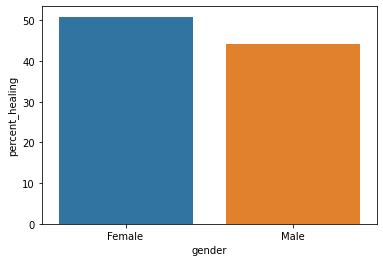

In [127]:
gen_healing = pd.crosstab(index=positive.gender,columns=positive['delayed healing']).reset_index()
gen_healing['percent_healing'] = gen_healing.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_healing',data=gen_healing);

A large percentage of male experienced genital thrush

### Obesity

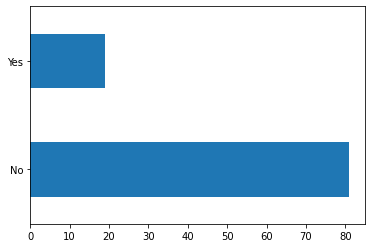

In [131]:
obesity = positive['obesity'].value_counts(normalize=True)*100
obesity.plot.barh();

Over 70 percent of the diabetic patients experienced genital thrush.

Let's see if genital thrush was more common in a particular gender

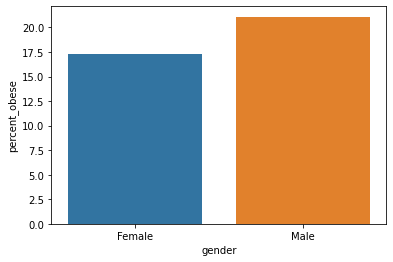

In [132]:
gen_obese = pd.crosstab(index=positive.gender,columns=positive['obesity']).reset_index()
gen_obese['percent_obese'] = gen_obese.apply(lambda x: x.Yes*100/(x.Yes+x.No),axis=1)
sns.barplot(x='gender',y='percent_obese',data=gen_obese);

A large percentage of male experienced genital thrush

# 4. Data Preprocessing

In [166]:
from sklearn.base import BaseEstimator,TransformerMixin

In [167]:
class Encoder(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        df = X.copy()
        df.replace(['Yes','Positive','Male','No','Negative','Female'],[1,1,1,0,0,0],inplace=True)
        return df

# 5. Model Building and Evaluation

In [19]:
from sklearn.model_selection import KFold
# import some models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# import evaluation functions
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,auc

In [ ]:
auc()

In [201]:
# create a list of models
models = [LogisticRegression(),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42),
          ExtraTreesClassifier(random_state=42),
          GradientBoostingClassifier(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier(random_state=42),
          CatBoostClassifier(random_state=42,verbose=0)
         ]

In [203]:
preprocessed = Encoder().fit_transform(df)
X = preprocessed.drop('class',axis=1)
y = preprocessed['class']
cv = KFold(n_splits=5,shuffle=True,random_state=42)
scores = {model.__class__.__name__:[] for model in models}
for model in models:
    for train_index,test_index in cv.split(df):
        X_train,X_test = X.iloc[train_index],X.iloc[test_index]
        y_train,y_test = y[train_index],y[test_index]
        model.fit(X_train,y_train)
        preds = model.predict(X_test)
        recall = recall_score(y_test,preds)
        scores[model.__class__.__name__].append(recall)

[19:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [208]:
{model:np.mean(scores[model]) for model in scores}

{'LogisticRegression': 0.9203744323866697,
 'DecisionTreeClassifier': 0.9567590721927193,
 'RandomForestClassifier': 0.9776100111598552,
 'ExtraTreesClassifier': 0.9873470330177788,
 'GradientBoostingClassifier': 0.968851208342954,
 'AdaBoostClassifier': 0.9299577657200031,
 'XGBClassifier': 0.9559891864850304,
 'LGBMClassifier': 0.9584987108443009,
 'CatBoostClassifier': 0.9713600111598553}

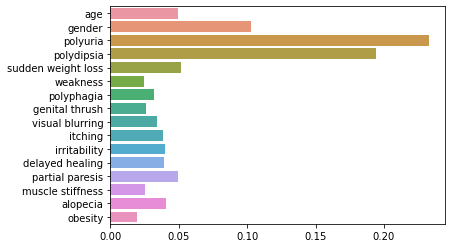

In [211]:
et = ExtraTreesClassifier(random_state=42)
et.fit(X,y)
sns.barplot(x=et.feature_importances_,y=X.columns);